In [1]:
from regression import *
from zkrp import *
import numpy as np
import pandas as pd
from code_zq.comparison import data_generation

In [2]:
def trans_data(l):
    res = []
    for i in l:
        if type(i) != tuple:
            res.append(i)
        else:
            for ii in i:
                res.append(ii)
    return res


def data_comparasion(x, y, x_test, y_test):
    x = x
    y = y
    x_test = x_test
    y_test = y_test
    ntrain = x.shape[0]
    ntest = x_test.shape[0]
    res = []
    evallist = ['RMSE', 'NHD', 'IOR', 'DC']

    x_l = x[:,0].reshape((ntrain,1))
    x_u = x[:,1].reshape((ntrain,1))
    x_c = x_u/2 + x_l/2
    x_r = x_u/2 - x_l/2
    y_l = y[:,0].reshape((ntrain,1))
    y_u = y[:,1].reshape((ntrain,1))
    y_c = y_u/2 + y_l/2
    y_r = y_u/2 - y_l/2
    y_c_test = y_test[:,1].reshape((ntest,1))/2 + y_test[:,0].reshape((ntest,1))/2
    y_r_test = y_test[:,1].reshape((ntest,1))/2 - y_test[:,0].reshape((ntest,1))/2
    x_c_test = x_test[:,1].reshape((ntest,1))/2 + x_test[:,0].reshape((ntest,1))/2
    x_r_test = x_test[:,1].reshape((ntest,1))/2 - x_test[:,0].reshape((ntest,1))/2

    ### HFmed-Method
    a_c_hatmed, b_c_hatmed, a_r_hatmed, b_r_hatmed = HF_med_Method(x,y)

    yhat_c_HFmed = a_c_hatmed * x_c_test + b_c_hatmed
    yhat_r_HFmed = a_r_hatmed * x_r_test + b_r_hatmed
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

   ### HF1-Method
    a_c_hat1, b_c_hat1, a_r_hat1, b_r_hat1 = HF_Method1(x,y)

    yhat_c_HF1 = a_c_hat1 * x_c_test + b_c_hat1
    yhat_r_HF1 = a_r_hat1 * x_r_test + b_r_hat1
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### HF2-Method
    a_c_hat2, b_c_hat2, a_r_hat2, b_r_hat2 = HF_Method2(x,y)

    yhat_c_HF2 = a_c_hat2 * x_c_test + b_c_hat2
    yhat_r_HF2 = a_r_hat2 * x_r_test + b_r_hat2
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### CM_Method
    hatBeta_CM = CM_Method(x_c, y_c)

    yhat_c_CM = predict(x_c_test, hatBeta_CM)
    yhat_r_CM = predict(x_r_test, hatBeta_CM)

    ### CRM_Method
    hatBeta_c_CRM, hatBeta_r_CRM = CRM_Method(x_c, y_c, x_r, y_r)

    yhat_c_CRM = predict(x_c_test, hatBeta_c_CRM)
    yhat_r_CRM = predict(x_r_test, hatBeta_r_CRM)

    ### CCRM_Method
    hatBeta_c_CCRM, hatBeta_r_CCRM = CCRM_Method(x_c, y_c, x_r, y_r)

    yhat_c_CCRM = predict(x_c_test, hatBeta_c_CCRM)
    yhat_r_CCRM = predict(x_r_test, hatBeta_r_CCRM)

    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HFmed, yhat_r_HFmed, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HF1, yhat_r_HF1, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HF2, yhat_r_HF2, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CM, yhat_r_CM, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CRM, yhat_r_CRM, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CCRM, yhat_r_CCRM, method=i, detail=True) for i in evallist]))
    return res

### CCRM 数据实验部分

In [3]:
def trans_to_datakxl(train, test):
    xtrain = np.array(train).T[:,0:2]
    ytrain = np.array(train).T[:,2:4]
    xtest = np.array(test).T[:,0:2]
    ytest = np.array(test).T[:,2:4]
    train_x = np.vstack((xtrain[:,0]-xtrain[:,1], xtrain[:,0]+xtrain[:,1])).T
    train_y = np.vstack((ytrain[:,0]-ytrain[:,1], ytrain[:,0]+ytrain[:,1])).T
    test_x = np.vstack((xtest[:,0]-xtest[:,1], xtest[:,0]+xtest[:,1])).T
    test_y = np.vstack((ytest[:,0]-ytest[:,1], ytest[:,0]+ytest[:,1])).T
    return train_x, train_y, test_x, test_y


def comparison2(a,b,c,d,e,f,g,h,i,j, path):
    evallist = ['RMSE', 'NHD', 'IOR', 'DC']
    eval_HFmed = []
    eval_HF1 = []
    eval_HF2 = []
    eval_CM = []
    eval_CRM = []
    eval_CCRM = []

    for iter in range(50):
        train, test, beta0, beta1, betastar = data_generation(375, a, b, c, d, e, f, g, h, i, j, iter)
        x, y, x_test, y_test = trans_to_datakxl(train, test)

        result = data_comparasion(x, y, x_test, y_test)
        eval_HFmed.append(result[0])
        eval_HF1.append(result[1])
        eval_HF2.append(result[2])
        eval_CM.append(result[3])
        eval_CRM.append(result[4])
        eval_CCRM.append(result[5])

    EV_HFmed = [np.mean(np.array(eval_HFmed),axis=0), np.var(np.array(eval_HFmed),axis=0)]
    EV_HF1 = [np.mean(np.array(eval_HF1),axis=0), np.var(np.array(eval_HF1),axis=0)]
    EV_HF2 = [np.mean(np.array(eval_HF2),axis=0), np.var(np.array(eval_HF2),axis=0)]
    EV_CM = [np.mean(np.array(eval_CM),axis=0), np.var(np.array(eval_CM),axis=0)]
    EV_CRM = [np.mean(np.array(eval_CRM),axis=0), np.var(np.array(eval_CRM),axis=0)]
    EV_CCRM = [np.mean(np.array(eval_CCRM),axis=0), np.var(np.array(eval_CCRM),axis=0)]

    result = [
        ['%.3f (%.3f)' % (EV_HFmed[0][i], EV_HFmed[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF1[0][i], EV_HF1[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF2[0][i], EV_HF2[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CM[0][i], EV_CM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CRM[0][i], EV_CRM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CCRM[0][i], EV_CCRM[1][i]) for i in range(8)]
    ]
    df = pd.DataFrame(result, index=['HF1', 'HF1', 'HF2', 'CM', 'CRM', 'CCRM'], columns=['RMSEL', 'RMSEU', 'RMSEC', 'RMSER', 'NHD', 'IOR', 'DCC', 'DCR']).T
    df.to_csv(path)


def plot_CCRM_data(a,b,c,d,e,f,g,h,i,j):
    train, test, beta0, beta1, betastar = data_generation(375, a, b, c, d, e, f, g, h, i, j, 0)
    x, y, x_test, y_test = trans_to_datakxl(train, test)
    show3(x,y,varname=["x", "y"])

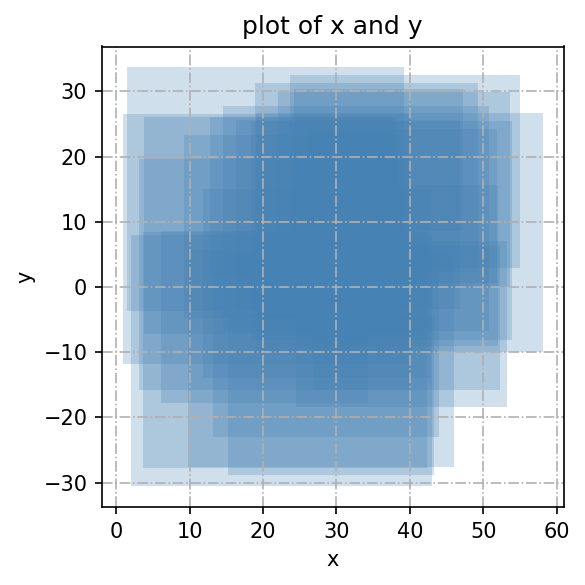

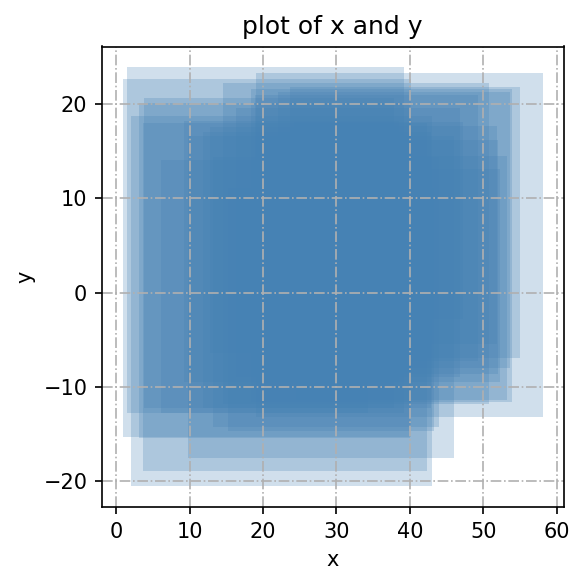

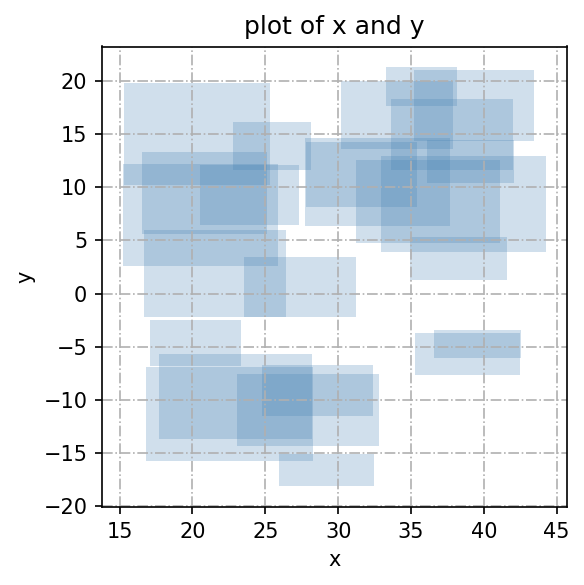

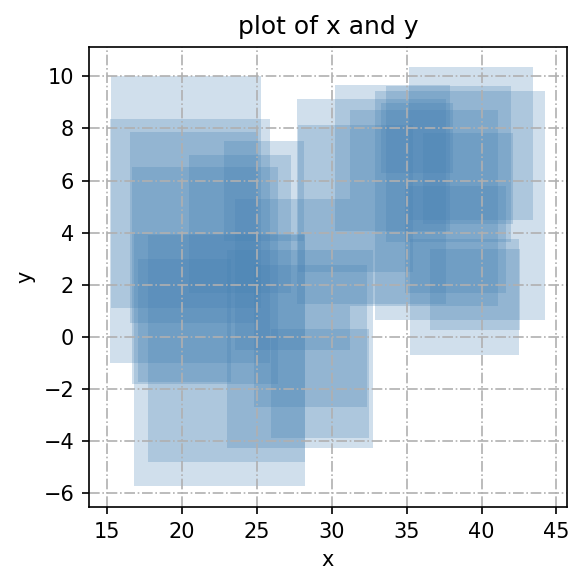

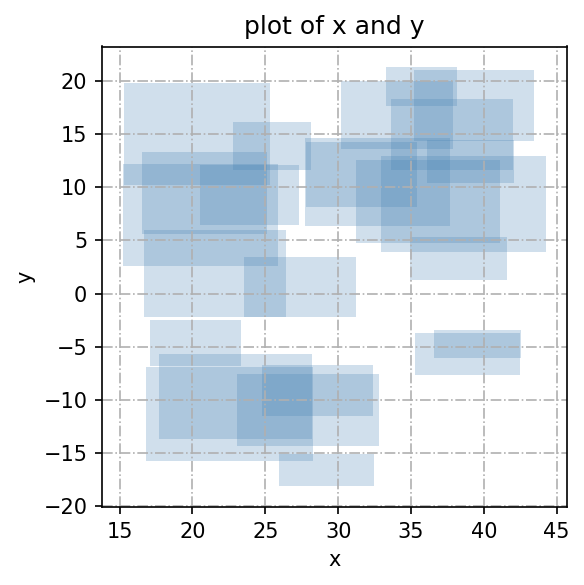

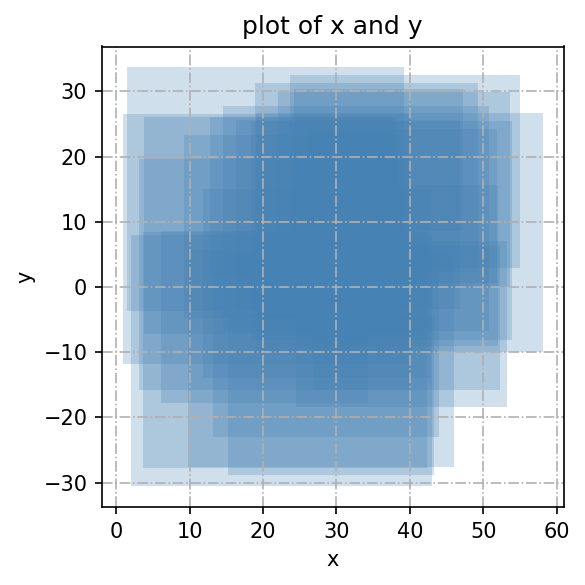

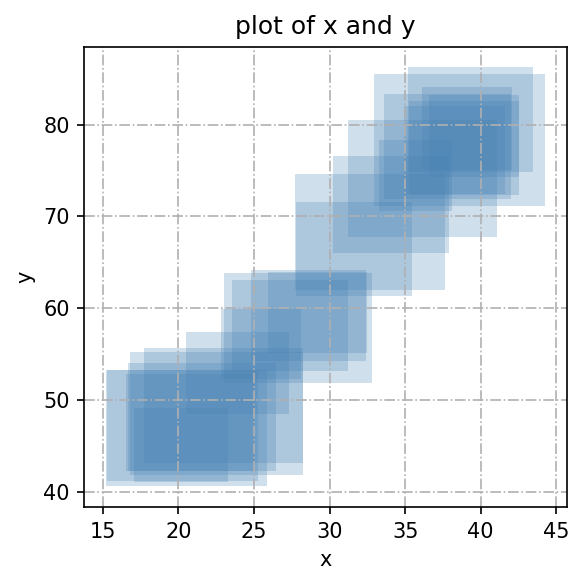

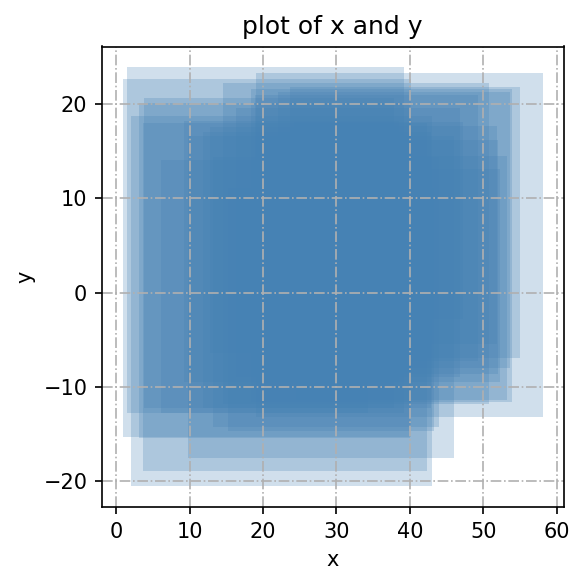

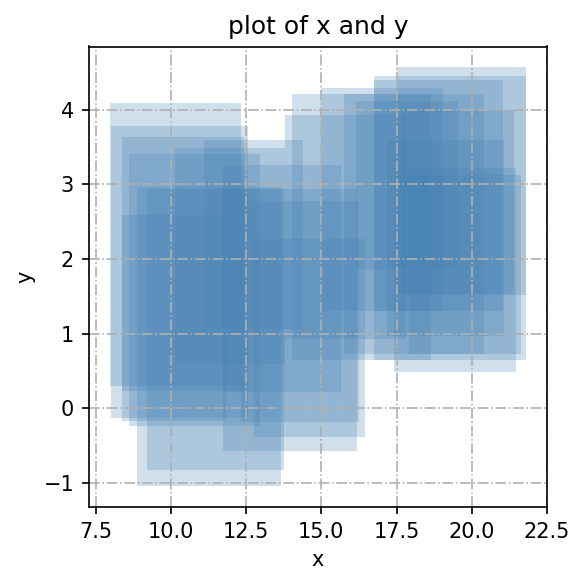

In [4]:
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20)
plot_CCRM_data(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2)

In [ ]:
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/CCRM1.csv')
print("= = = = =")
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/CCRM2.csv')
print("= = = = =")
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/CCRM3.csv')
print("= = = = =")
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5, path='data/reg_result/CCRM4.csv')
print("= = = = =")
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/CCRM5.csv')
print("= = = = =")
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/CCRM6.csv')
print("= = = = =")
comparison2(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5, path='data/reg_result/CCRM7.csv')
print("= = = = =")
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/CCRM8.csv')
print("= = = = =")
comparison2(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2, path='data/reg_result/CCRM9.csv')
print("= = = = =")

### 非均匀分布数据模拟部分

### 非线性特例数据部分

### 实际数据部分

In [ ]:
def realdata_sixmethod(xx, yy, path, niter = 20):
    """
    随机抽 2/3 进行训练, 1/3 进行.重复进行20次，计算各个指标的大小，以及指标的均值
    :param path: 返回结果的储存路径
    :param niter: 迭代次数
    :param xx: array-like(n,2).
    :param yy: array-like(n,1).
    :return: none. save result as csv
    """
    assert xx.shape[0] == yy.shape[0]
    n = xx.shape[0]
    assert n >= 8
    ntest = int(np.ceil(n/3))
    ntrain = n - ntest

    evallist = ['RMSE', 'NHD', 'IOR', 'DC']
    eval_HFmed = []
    eval_HF1 = []
    eval_HF2 = []
    eval_CM = []
    eval_CRM = []
    eval_CCRM = []

    for i in range(niter):
        test_index = np.random.choice(n, size=ntest, replace=False).tolist()
        x_test = np.array([xx[i,:].tolist() for i in test_index])
        x = np.delete(xx, test_index, axis=0)
        y_test = np.array([yy[i,:].tolist() for i in test_index])
        y = np.delete(yy, test_index, axis=0)

        result = data_comparasion(x, y, x_test, y_test)

        eval_HFmed.append(result[0])
        eval_HF1.append(result[1])
        eval_HF2.append(result[2])
        eval_CM.append(result[3])
        eval_CRM.append(result[4])
        eval_CCRM.append(result[5])

    EV_HFmed = [np.mean(np.array(eval_HFmed),axis=0), np.var(np.array(eval_HFmed),axis=0)]
    EV_HF1 = [np.mean(np.array(eval_HF1),axis=0), np.var(np.array(eval_HF1),axis=0)]
    EV_HF2 = [np.mean(np.array(eval_HF2),axis=0), np.var(np.array(eval_HF2),axis=0)]
    EV_CM = [np.mean(np.array(eval_CM),axis=0), np.var(np.array(eval_CM),axis=0)]
    EV_CRM = [np.mean(np.array(eval_CRM),axis=0), np.var(np.array(eval_CRM),axis=0)]
    EV_CCRM = [np.mean(np.array(eval_CCRM),axis=0), np.var(np.array(eval_CCRM),axis=0)]

    result = [
        ['%.3f (%.3f)' % (EV_HFmed[0][i], EV_HFmed[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF1[0][i], EV_HF1[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF2[0][i], EV_HF2[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CM[0][i], EV_CM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CRM[0][i], EV_CRM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CCRM[0][i], EV_CCRM[1][i]) for i in range(8)]
    ]
    df = pd.DataFrame(result, index=['HF1', 'HF1', 'HF2', 'CM', 'CRM', 'CCRM'], columns=['RMSEL', 'RMSEU', 'RMSEC', 'RMSER', 'NHD', 'IOR', 'DCC', 'DCR']).T
    df.to_csv(path)